The system shown in the figure below is a processing system for a helicopter. The system has dual-redundant processors and dual-redundant interface units. Two
buses are used in the system, and each bus is also dual-redundant. The interesting part of the system is the navigation equipment. The aircraft can be completely navigated using the Inertial Navigation System (INS). If the INS fails, the aircraft can be navigated using the combination of the Doppler and the altitude heading and reference system (AHRS). The system contains three AHRS units, of which only one is needed. This is an example of functional redundancy where the data from the AHRS and the Doppler can be used to replace the INS, if the INS fails. Because of the other sensors and instrumentation, both buses are required for the system to function properly regardless of which navigation mode is being employed.


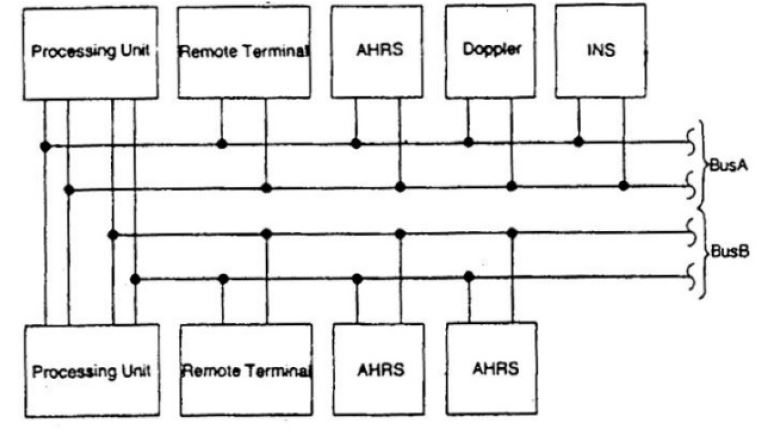



1.   **Draw the reliability block diagram of the system.**

2.   **Draw the Fault Tree of the system and analyze the minimal cutsets.**

3.   **Calculate the reliability for a one-hour flight using the MTTF figures given in the table below. Assume that the exponential failure low applies and that thefault coverage is perfect.**

 $$
\begin{array}{|c|c|}
  \hline
  \text{Equipment} & \text{MTTF (hr) } \\
  \hline
  \text{Processing Unit } & \text{10000 } \\
  \hline
    \hline
  \text{Remote Terminal } & \text{4500 } \\
  \hline
    \hline
  \text{AHRS } & \text{2000} \\
  \hline
    \hline
  \text{INS  } & \text{2000 } \\
  \hline
  \hline
    \hline
  \text{Doppler } & \text{500 } \\
  \hline
  \hline
    \hline
  \text{Bus   } & \text{60000 } \\
  \hline
\end{array}
$$




4. **Repeat (3), but this time, incorporate a coverage factor for the fault detection and reconfiguration of the processing units. Using the same failure data,determine the approximate fault coverage value that is required to obtain a reliability(at the end of one hour) of 0.99999.**







## **1.RBD system**

Poichè è necessario che almeno un processore, un bus (che sia il Bus A od il Bus
B) ed il processore funzioni, possiamo considerare la serie dei quattro paralleli di queste componenti, di cui è stata fatta una ridondanza; inoltre, sappiamo che può funzionare o l’INS oppure la serie tra il doppler ed i tre AHRS. Otteniamo quindi il seguente RBD:

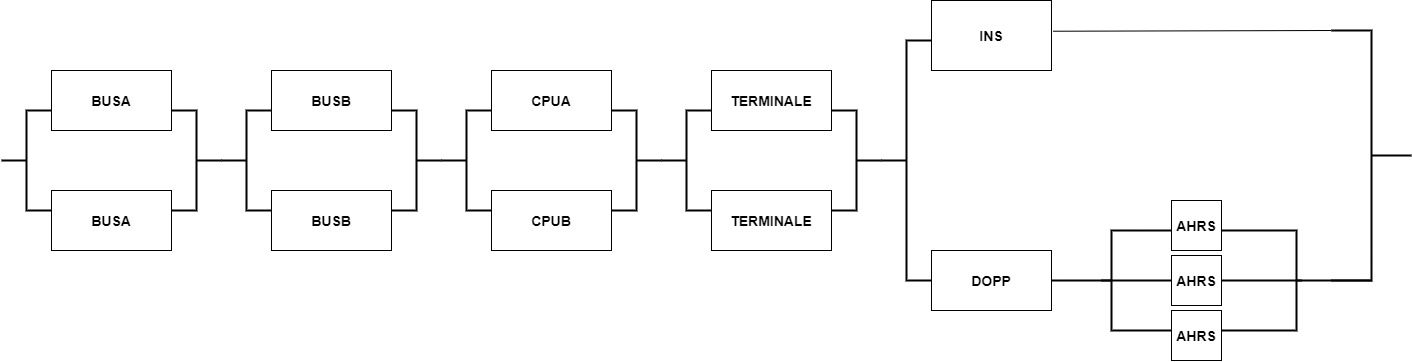



# **2.Fault Tree System**

Per disgnare il fault tree, basta tenere a mente che i componenti in parallelo
saranno sostituiti con porte AND, mentre i componenti in serie saranno sostituiti con una OR: il fallimento di uno di questi componenti porta al fallimento del sottosistema.Otteniamo così il seguente albero:

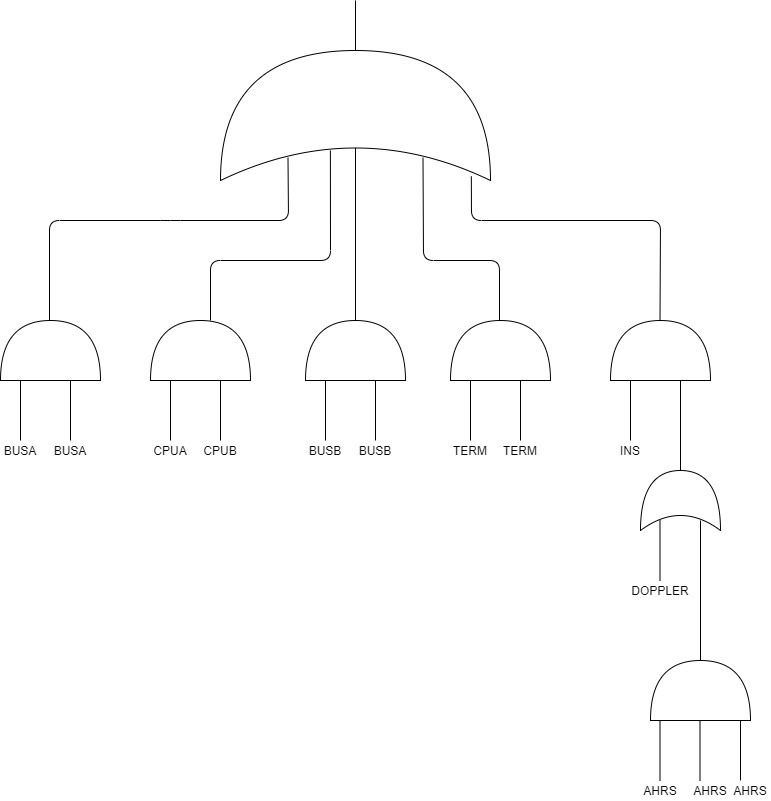

Per quanto rigurda i minimal cutset, noi sappiamo che questo altro non è che
il più piccolo insieme di eventi di base che, in congiunzione, fa sì che si verifichi l’evento di primo livello, nel nostro caso il fallimento del sistema; osservandol’albero, possiamo quindi trovare i seguenti minimal cutset:


1.   BUSA - BUSA
2.   CPUA - CPUB
3.   BUSB - BUSB
4.   TERM - TERM
5.   INS - DOPPLER
6.   INS - AHRSx3





# **3.Calcolo reliability sistema**

Avendo la tabella che ci dice l’MTTF, sapendo che `e applicata la legge esponenziale e che la coverage è pari ad 1, per calcolare la reliability non ci resta che andare a ricavare l’equazione dal nostro RBD. L’equazione risultante è la seguente:

 $ R_{sys}=(1-(1-R_{CPU})^2)*(1-(1-R_{TERM})^2)*(1-(1-R_{INS})^2)*(1-(1-R_{BUSA})^2)*(1-(R_{DOPPL}*(1-R_{AHRS})^3)) $

Tenendo conto che i valori di λ sono :


1.   $ λ_{CPU}=0.0001$
2.  $ λ_{TERM}=0.00022$
3. $   λ_{AHRS}=0.0005$
4.  $ λ_{INS}=0.0005$
5.   $λ_{DOPPL}=0.002$
6.   $λ_{BUS}=0.00002$







Otteniamo che la reliability totale del sistema, in un ora di viaggio, è pari a
circa 0,9999989.

# **4.Calcolo reliability con fattore di covarage**

Sino ad ora, le nostre analisi si sono basate sul fatto che la detection dei
fallimenti avvenisse sempre, senza errori; con il fattore di coverage, invece,
stiamo dando una certa probabilità che la detection del fallimento sia rilevata,che non necessariamente è 1.In questo sistema è necessario introdurre un fattore di coverage per quanto riguarda le processing unit. Poichè i due componenti sono in parallelo, si segue la formula scritta in precedenza:

$ R_{CpuTot}=R_{CPU}+c*(1-R_{CPU})*R_{CPU}$

Raggruppo la reliability degli altri sottosistemi $R_{sottosistema} $  e mettendo  insieme in un unica equazione   imponendo all’equazione $ R_{sys} = 0.99999 $  ed $t=1$:

$0.99999= (R_{CPU}+c*(1-R_{CPU})*R_{CPU})*R_{sottosistema} $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
MTTF_cpu = 10000
MTTF_rt = 4500
MTTF_ahrs = 2000
MTTF_ins = 2000
MTTF_dopp = 500
MTTF_bus = 60000
R = 0.99999
# Reliability a mission time 1 ora
mission_time = 1
r_cpu_mt = np.exp((-1/MTTF_cpu) * mission_time)
r_rt_mt = np.exp((-1/MTTF_rt) * mission_time)
r_ahrs_mt = np.exp((-1/MTTF_ahrs) * mission_time)
r_ins_mt = np.exp((-1/MTTF_ins) * mission_time)
r_dopp_mt = np.exp((-1/MTTF_dopp) * mission_time)
r_bus_mt = np.exp((-1/MTTF_bus) * mission_time)
R1 = (1 - (1 - r_cpu_mt)**2) * (1 - (1 - r_rt_mt)**2) * (1 - (1 - r_bus_mt)**2)**2 * (1 - (1 - r_ins_mt) * (1 - r_dopp_mt * (1 - (1 - r_ahrs_mt)**3)))
Rsottosistema = (1 - (1 - r_rt_mt)**2) * (1 - (1 - r_bus_mt)**2)**2 * (1 - (1 - r_ins_mt) * (1 - r_dopp_mt * (1 - (1 - r_ahrs_mt)**3)))
c1 = (R - r_cpu_mt * Rsottosistema) / (Rsottosistema * r_cpu_mt * (1 - r_cpu_mt))
print(f"c={c1}")

Quindi,da questa equazione ricaviamo che  ci servirà un fattore di coverage **c= 0.9105** per poter avere una reliability
del sistema pari a 0.99999